<a href="https://colab.research.google.com/github/aayush9628/cs480student/blob/main/05/Copy_of_CS480_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

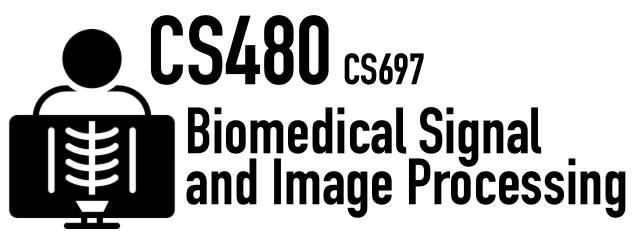
#Assignment 5

In [ ]:
# In this assignment, we will visualize and explore a CT scan!

In [1]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# we are using pydicom, so lets install it!
!pip install pydicom

     |████████████████████████████████| 2.0 MB 5.3 MB/s 


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [3]:
# Please download https://cs480.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [4]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

There are 220 slices.

In [5]:
# TODO: YOUR_ANSWER

In [6]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [7]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

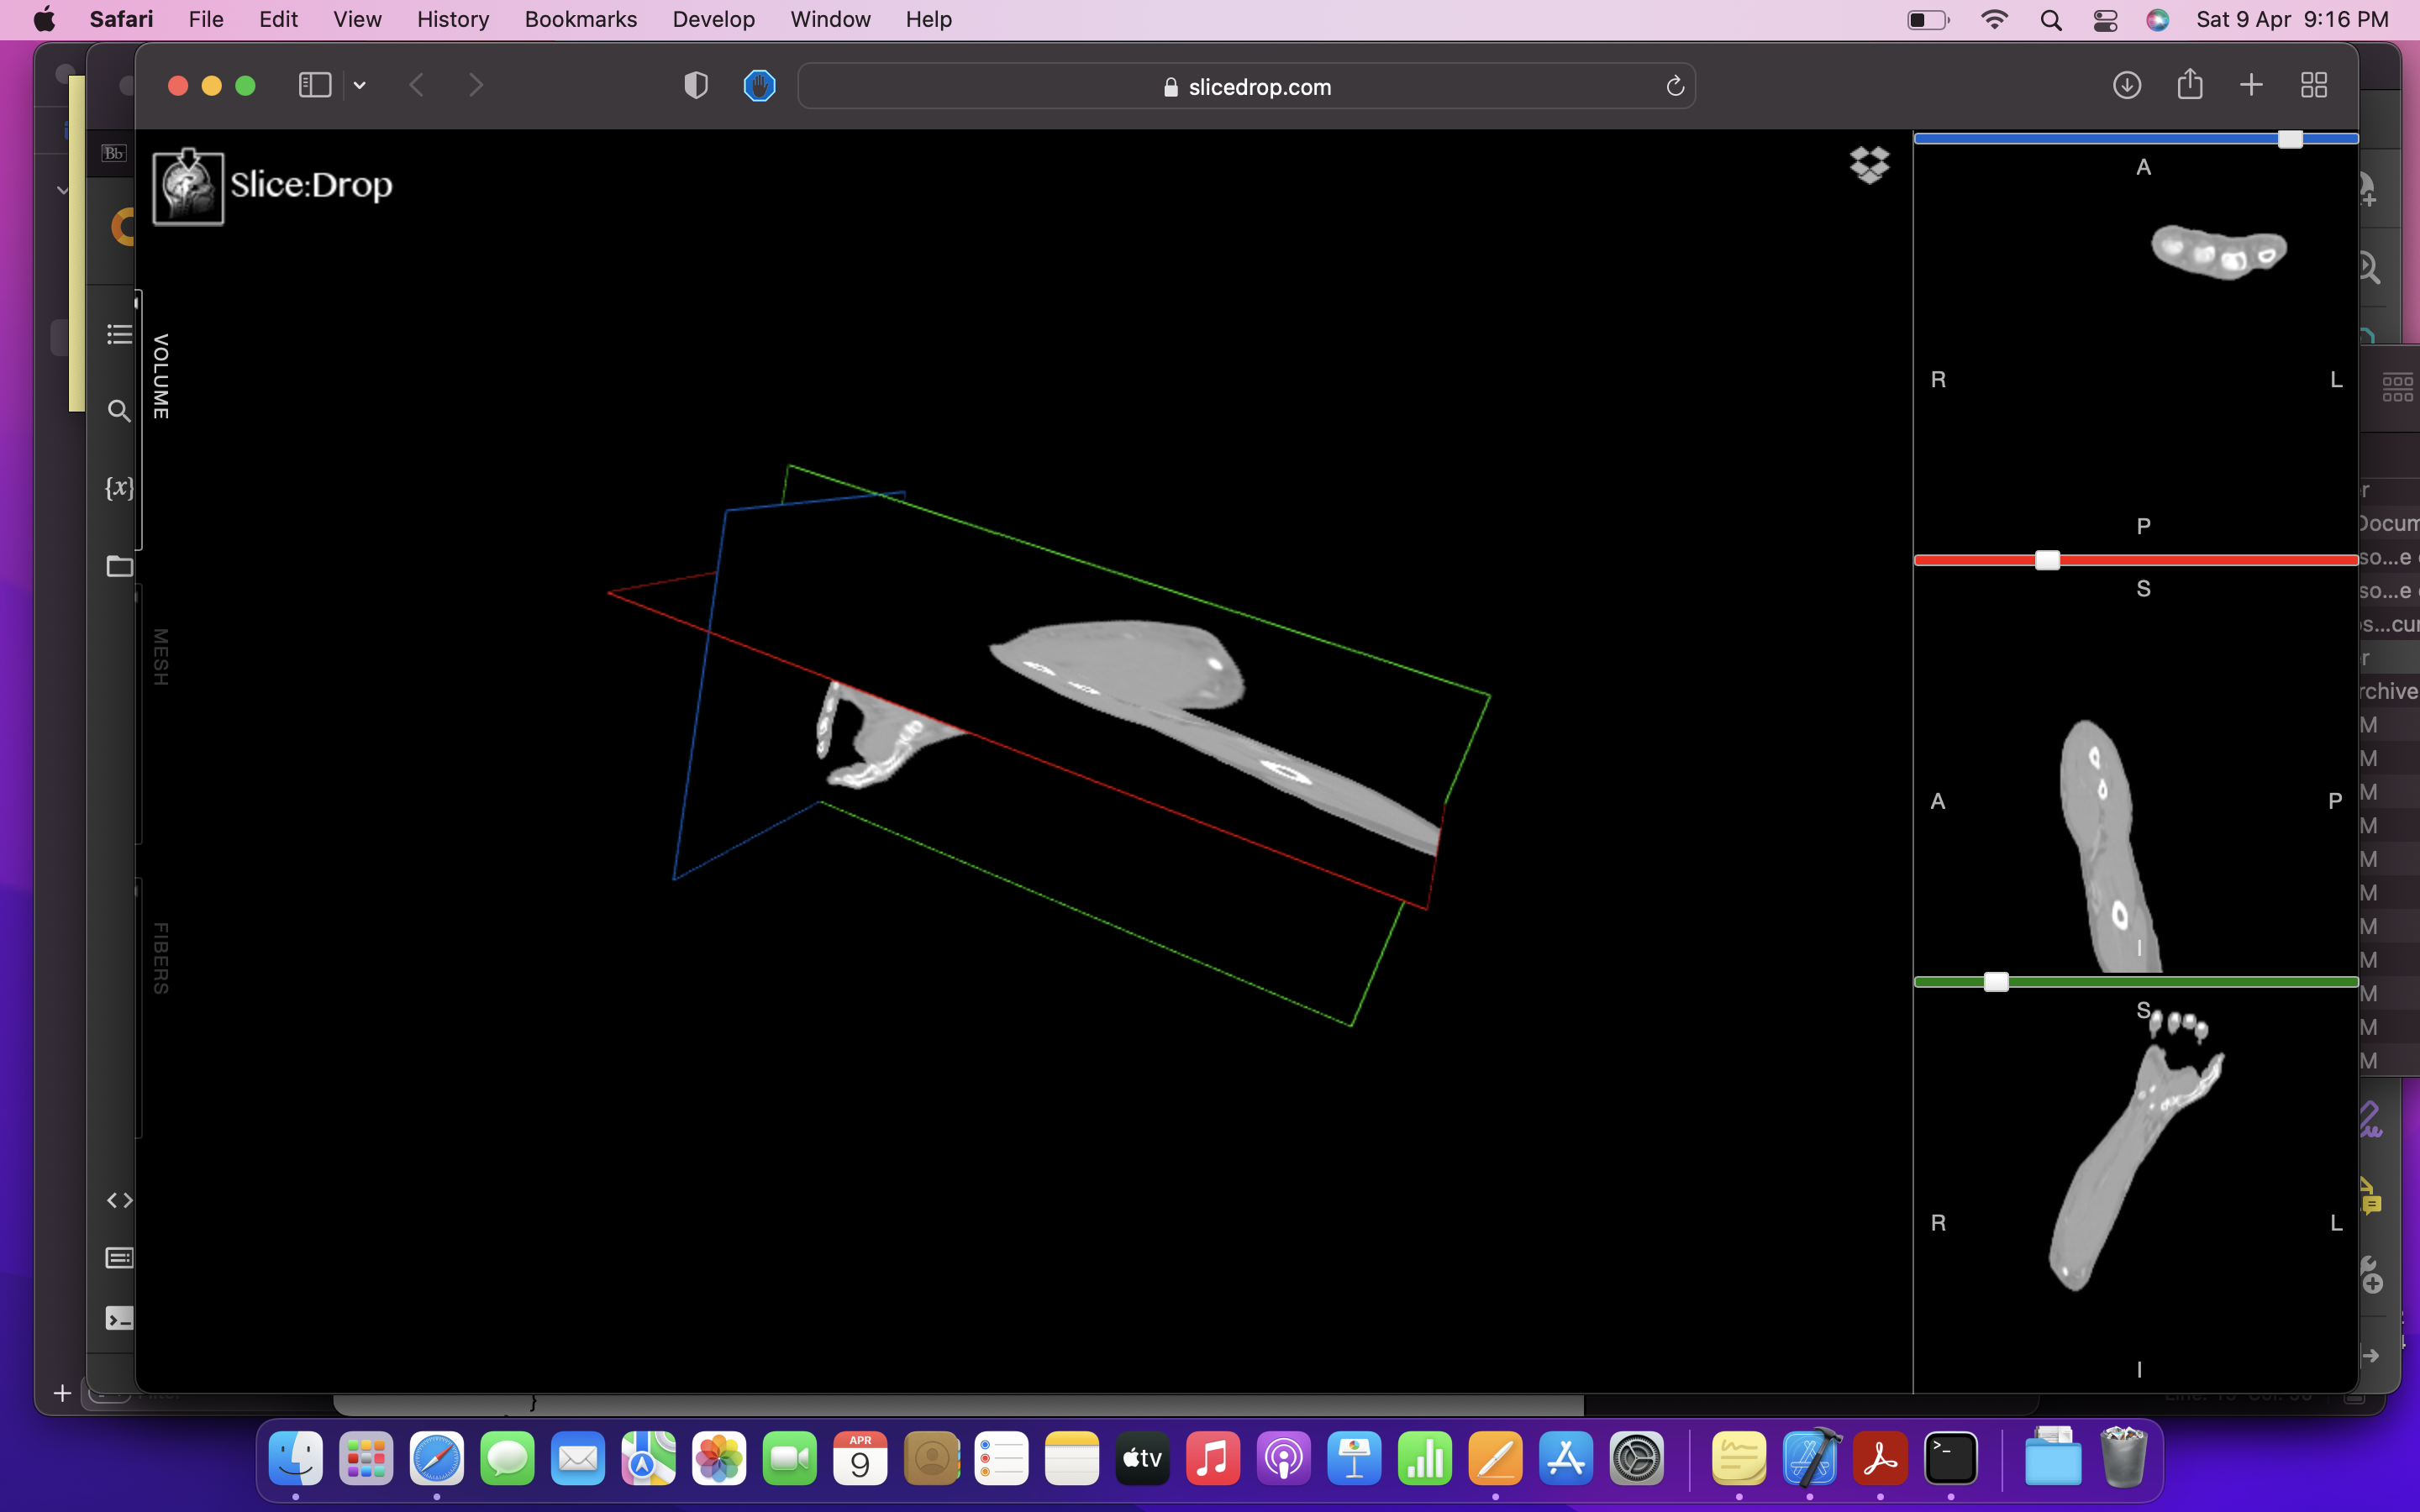

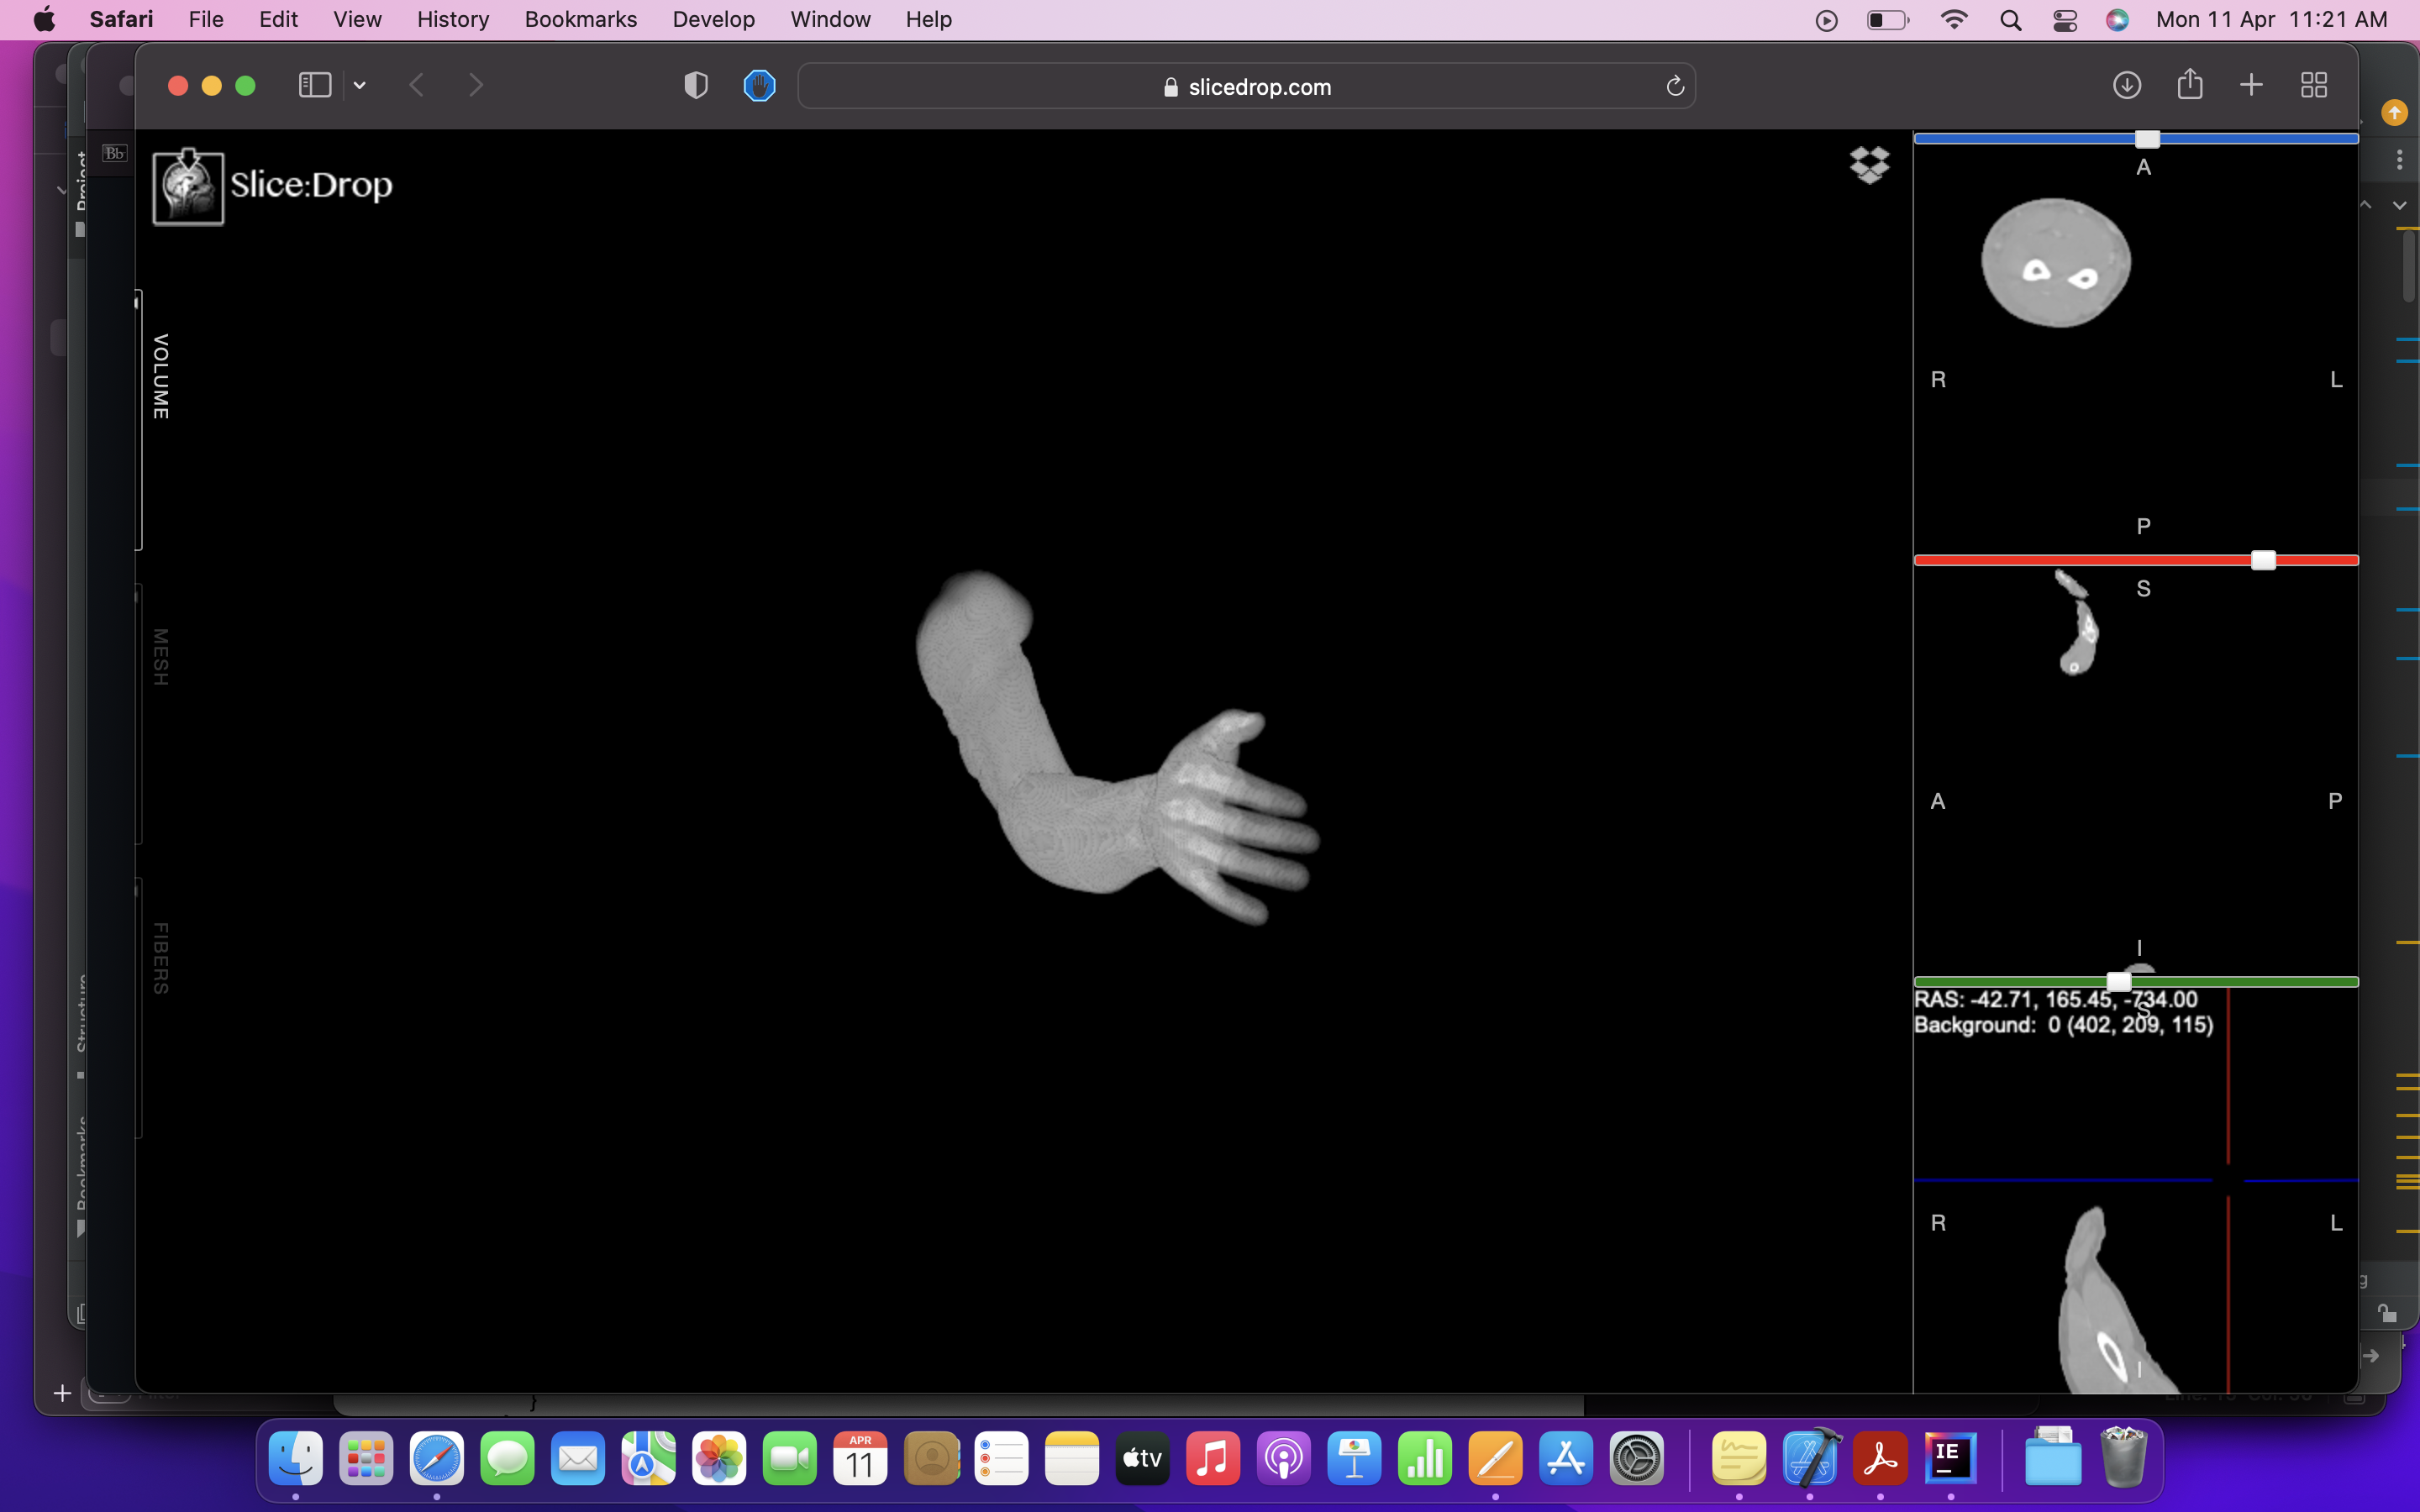

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [8]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [8]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [11]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.
import os
import numpy as np
DIR = "."
data_array = os.listdir(DIR)
for filename in data_array:
  if(".dcm" not in filename):
    data_array.remove(filename)

data_array.sort()

In [12]:
from pydicom import dcmread

In [17]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY
import matplotlib.pyplot as plt
data = dcmread(data_array[0])
dimensions = data.pixel_array.shape
threeD_array = np.empty((dimensions[0], dimensions[1], len(data_array)))
for i in range(len(data_array)):
  data = dcmread(data_array[i])
  threeD_array[:,:, i] = data.pixel_array

220

In [14]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

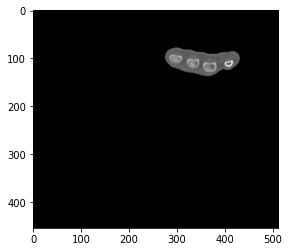

In [20]:
# TODO: YOUR CODE FOR AXIAL
plt.imshow(threeD_array[:,:,32], cmap='gray')

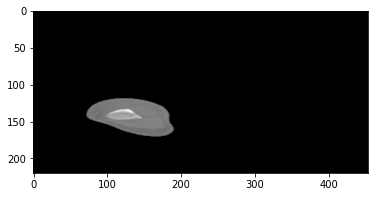

In [21]:
# TODO: YOUR CODE FOR SAGITTAL
plt.imshow(threeD_array[:,48,:].T, cmap='gray')

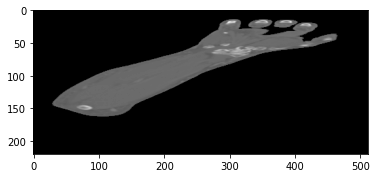

In [25]:
# TODO: YOUR CODE FOR CORONAL
plt.imshow(threeD_array[89,:,:].T, cmap='gray')

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [74]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [93]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

In [27]:
# TODO: YOUR CODE
data = dcmread(data_array[0])
window = data.WindowWidth
level = data.WindowCenter
print("Window width value", data[0x0028, 0x1050])
print("Window level value", data[0x0028, 0x1051])

Window width value (0028, 1050) Window Center                       DS: '30.0'
Window level value (0028, 1051) Window Width                        DS: '410.0'


In [ ]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

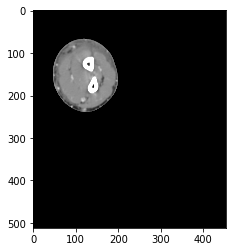

In [31]:
# TODO: YOUR CODE
vmin = level - window/2
vmax = level + window/2
plt.imshow(threeD_array[:,:,110].T + data.RescaleIntercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

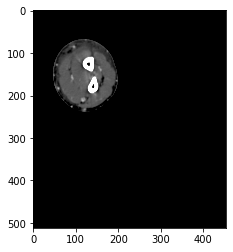

In [35]:
level = 100
window = 300
vmin = level - window/2
vmax = level + window/2
plt.imshow(threeD_array[:,:,110].T + data.RescaleIntercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

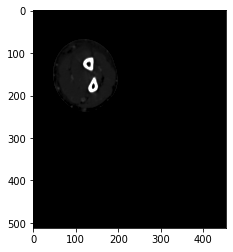

In [36]:
level = 500
window = 1100
vmin = level - window/2
vmax = level + window/2
plt.imshow(threeD_array[:,:,110].T + data.RescaleIntercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [ ]:
# Which values make sense and why?

In [ ]:
# TODO: YOUR ANSWER

As the values for level and window go higher, bones become more prominent, so to capture certain tissues we need to check in what hounsfield range the values exist.

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

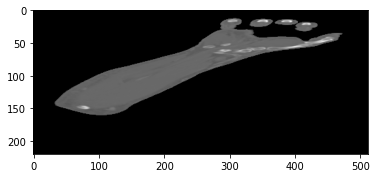

In [90]:
# TODO: YOUR CODE TO SEGMENT FAT
level = -150
window = 800
vmin = level - window
vmax = level + window
index = 85
image = threeD_array.copy().astype(np.int16)
image[(image < vmin) & (image > vmax)] = 0
plt.imshow(image[index,:,:].T + data.RescaleIntercept, cmap='gray')
plt.show()

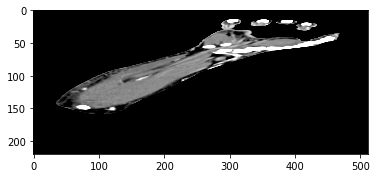

In [88]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
level = 50
window = 200
vmin = level - window/2
vmax = level + window/2
index = 85
image = threeD_array.copy().astype(np.int16)
image[(image > vmin) & (image < vmax)] = 0
plt.imshow(image[index,:,:].T + data.RescaleIntercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

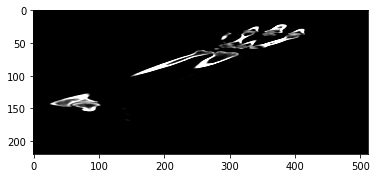

In [87]:
# TODO: YOUR CODE TO SEGMENT BONES
level = 500
window = 1100
vmin = level - window/3
vmax = level + window/3
index = 114
image = threeD_array.copy().astype(np.int16)
image[(image < vmin) & (image > vmax)] = 0
plt.imshow(image[index,:,:].T + data.RescaleIntercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [ ]:
# Are the segmentations good?

In [ ]:
# TODO: YOUR ANSWER

The segementations are fine. They definitely allow us to have a distinct view of the respective tissues, bones and fat.

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""